In [2]:
# %%
%pip install mlxtend

# %%
# import libraries
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("dark")
%matplotlib inline

from mlxtend.frequent_patterns import association_rules, apriori # for mining frequent itemsets and association rule

import warnings
warnings.filterwarnings("ignore")

import random
import matplotlib.pyplot as plt
import networkx as nx

from datetime import datetime

Note: you may need to restart the kernel to use updated packages.


In [3]:
# 
file_path = '/workspaces/python-learning-repo/python_tutorial_code/Data.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

In [4]:
df['unique_id'] = df['FamilyID']+'-'+df['IndividualID'].astype(str)

In [5]:
df2 = df[['FamilyID','1.1', '1.2', '1.3', '1.4', '2.1', '2.2', '2.3', '3.1', 
          '3.2', '3.3', '4.1','4.2', '5.1', '5.2', '5.3', '5.4', '6.1', '6.2', 
          '6.3', '6.4', '6.5', '7.1', '7.2', '7.3', '8.1', '8.2', '8.3',
          '9.1', '9.2', '9.3', '10.1', '10.2', '10.3', 'Crit-1', 'Crit-2',
          'Crit-3', 'Crit-4', 'Crit-5', 'Crit-6', 'Crit-7', 'Crit-8', 
          'Crit-9', 'Crit-10']]

In [6]:
# Pivot table with max aggregation
max_df = df2.pivot_table(index='FamilyID', aggfunc=max)  # Replace 'unique_id' with your actual ID column name

In [7]:
full = df.merge(max_df, on='FamilyID', how='left')

In [8]:
df3 = full.drop(['1.1_x','1.2_x', '1.3_x', '1.4_x', '2.1_x', '2.2_x', '2.3_x', 
                '3.1_x', '3.2_x','3.3_x', '4.1_x', '4.2_x', '5.1_x', '5.2_x', 
                '5.3_x', '5.4_x', '6.1_x', '6.2_x', '6.3_x', '6.4_x', '6.5_x',
                '7.1_x', '7.2_x', '7.3_x', '8.1_x','8.2_x', '8.3_x', '9.1_x', 
                '9.2_x', '9.3_x', '10.1_x', '10.2_x','10.3_x', 'Crit-1_x', 
                'Crit-2_x', 'Crit-3_x', 'Crit-4_x', 'Crit-5_x',
                'Crit-6_x', 'Crit-7_x', 'Crit-8_x', 'Crit-9_x', 'Crit-10_x'], 
                axis=1)

In [9]:
new_cols = [col.rstrip('_y') for col in df3.columns]  # Remove suffix using rstrip
df3.columns = new_cols

In [10]:
# Replace prefix with 'criteria_'
def replace_prefix(df3):
  return df3.rename(columns=lambda x: x.replace('Crit-', 'criteria_', 1))

df3 = replace_prefix(df3.copy())  # Apply to a copy to avoid modifying original DataFrame

In [11]:
df4 = df3[['FamilyID','criteria_1', 'criteria_2',
       'criteria_3', 'criteria_4', 'criteria_5', 'criteria_6', 'criteria_7',
       'criteria_8', 'criteria_9', 'criteria_10']]

In [12]:
# Drop duplicate rows based on the 'ID' column, keeping the first occurrence
df_unique = df4.drop_duplicates(subset='FamilyID', keep='first')

df_unique.head()

,FamilyID,criteria_1,criteria_2,criteria_3,criteria_4,criteria_5,criteria_6,criteria_7,criteria_8,criteria_9,criteria_10
0,KC0058,1,0,1,0,1,0,0,1,0,1
33,KC0117,1,0,1,0,1,0,1,0,0,0
49,KC0252,1,0,1,0,1,0,0,1,1,0
59,KC0374,0,0,0,0,1,1,0,1,0,0
74,KC0730A,1,0,0,1,1,0,0,0,0,0


In [13]:
# Set the first column ('ID') as the index
df_unique.set_index('FamilyID', inplace=True)

In [14]:
df_final = df_unique[['criteria_1', 'criteria_2',
       'criteria_3', 'criteria_4', 'criteria_5', 'criteria_6', 'criteria_7',
       'criteria_8', 'criteria_9', 'criteria_10']]

[Text(0, 0, 'criteria_5'),
 Text(1, 0, 'criteria_3'),
 Text(2, 0, 'criteria_1'),
 Text(3, 0, 'criteria_8'),
 Text(4, 0, 'criteria_6'),
 Text(5, 0, 'criteria_10'),
 Text(6, 0, 'criteria_4'),
 Text(7, 0, 'criteria_2'),
 Text(8, 0, 'criteria_7'),
 Text(9, 0, 'criteria_9')]

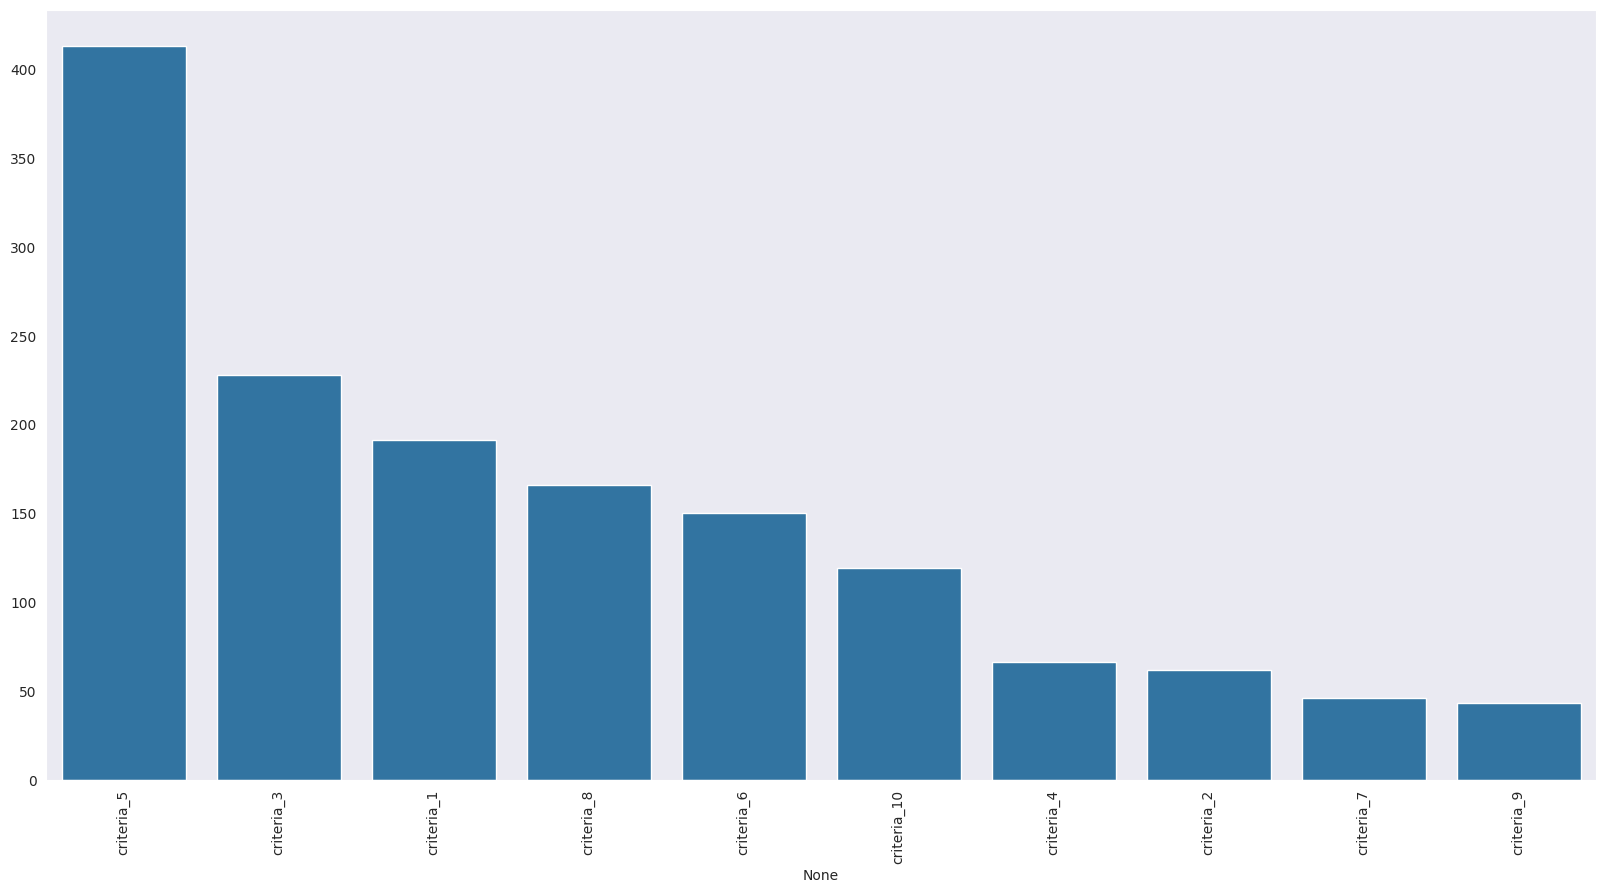

In [15]:
##Lets consider the top 20 items purchased freequently
r=df_final.sum(axis=0).sort_values(ascending=False)[:20]
#altering the figsize
plt.figure(figsize=(20,10))
s=sns.barplot(x=r.index,y=r.values)
s.set_xticklabels(s.get_xticklabels(), rotation=90)

[Text(0, 0, '5.1'),
 Text(1, 0, '3.1'),
 Text(2, 0, '8.1'),
 Text(3, 0, '6.1'),
 Text(4, 0, '1.4'),
 Text(5, 0, '3.2'),
 Text(6, 0, '10.2'),
 Text(7, 0, '10.1'),
 Text(8, 0, '8.2'),
 Text(9, 0, '8.3'),
 Text(10, 0, '2.1'),
 Text(11, 0, '4.1'),
 Text(12, 0, '1.1'),
 Text(13, 0, '3.3'),
 Text(14, 0, '1.3'),
 Text(15, 0, '5.2'),
 Text(16, 0, '9.2'),
 Text(17, 0, '7.1'),
 Text(18, 0, '7.2'),
 Text(19, 0, '1.2')]

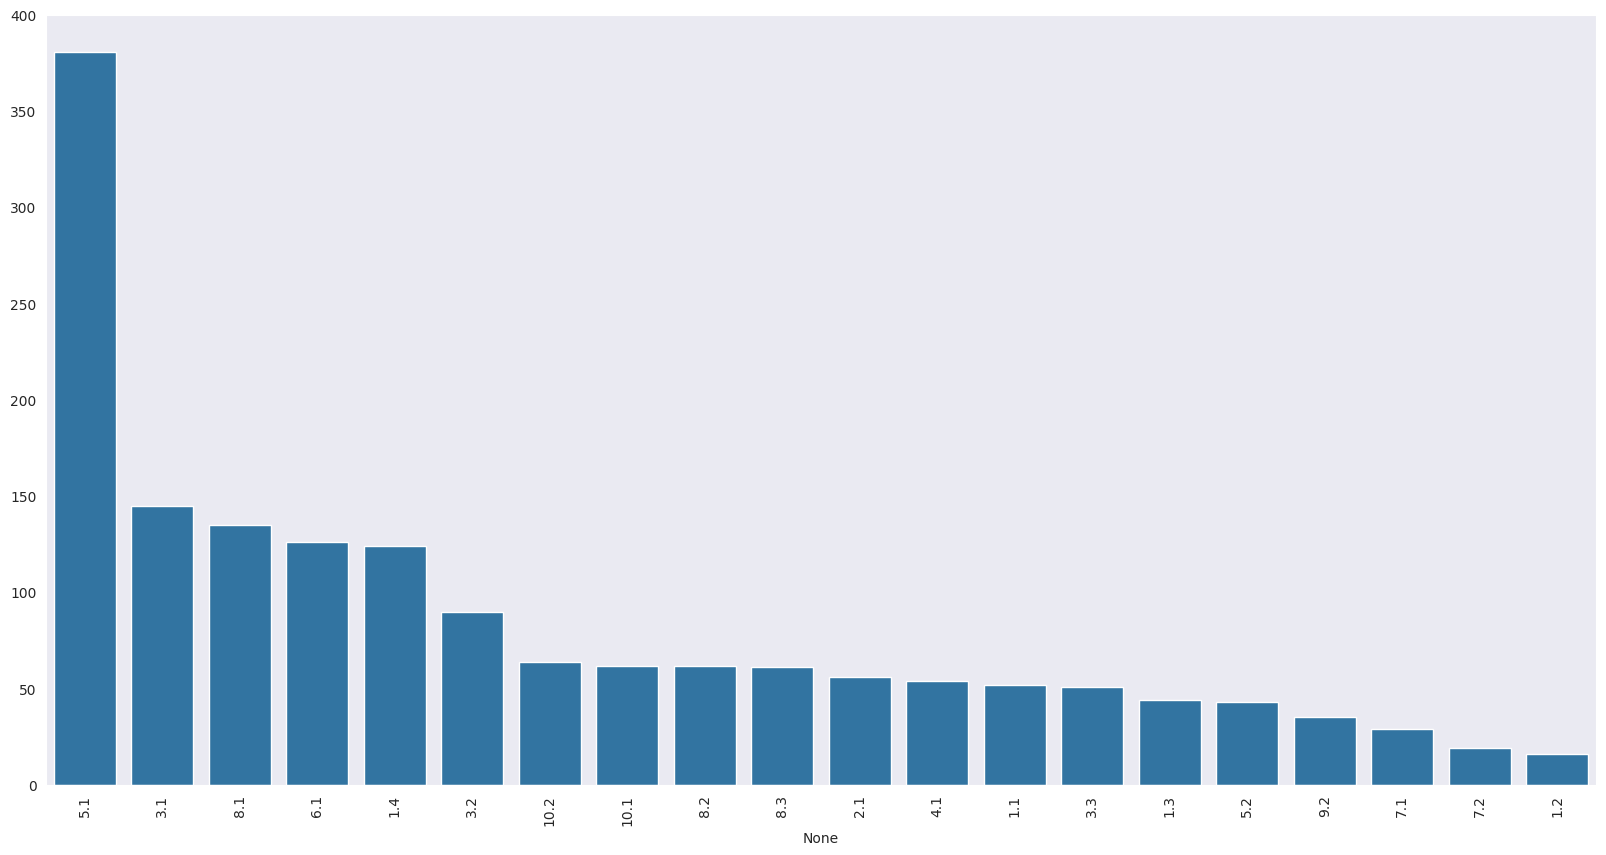

In [16]:
df8 = df3[['FamilyID','1.1', '1.2', '1.3', '1.4', '10.1', '10.2', '10.3', '2.1', '2.2', '2.3',
       '3.1', '3.2', '3.3', '4.1', '4.2', '5.1', '5.2', '5.3', '5.4', '6.1',
       '6.2', '6.3', '6.4', '6.5', '7.1', '7.2', '7.3', '8.1', '8.2', '8.3',
       '9.1', '9.2', '9.3']]
df8 = df8.drop_duplicates(subset='FamilyID', keep='first')

# Set the first column ('ID') as the index
df8.set_index('FamilyID', inplace=True)
##Lets consider the top 20 items purchased freequently
r=df8.sum(axis=0).sort_values(ascending=False)[:20]
#altering the figsize
plt.figure(figsize=(20,10))
s=sns.barplot(x=r.index,y=r.values)
s.set_xticklabels(s.get_xticklabels(), rotation=90)


## Basket Analysis has three main components:

### Support -  the overall popularity of a given citeria.

### Confidence - the likelihood of different purchase combinations. 
 (probability of seeing the consequent item (a "then" term) within data, given that the data also contains the antecendent (the "if" term) item)

### Lift - It takes the actual support (how often they are bought together) and divides it by the expected confidence (the chance of buying them independently).

Interpreting Lift Values:

- Lift > 1: This indicates a positive lift. It suggests that customers who buy item A are more likely to also buy item B than expected by chance. In simpler terms, there's a positive association between the two items.

- Lift = 1: This means the observed co-occurrence of items is exactly what you'd expect by chance. There's no significant relationship.

- Lift < 1: This indicates a negative lift. Here, customers who buy item A are less likely to also buy item B than expected by chance. There might be a negative association or no clear connection.

In [17]:
frequent_itemsets = apriori(df_final, min_support=0.001, use_colnames=True)

rules = association_rules(frequent_itemsets, metric="lift")

rules.head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(criteria_1),(criteria_2),0.454762,0.147619,0.071429,0.157068,1.064009,0.004297,1.011210,0.110335
1,(criteria_2),(criteria_1),0.147619,0.454762,0.071429,0.483871,1.064009,0.004297,1.056399,0.070577
2,(criteria_3),(criteria_1),0.542857,0.454762,0.204762,0.377193,0.829430,-0.042109,0.875453,-0.310276
3,(criteria_1),(criteria_3),0.454762,0.542857,0.204762,0.450262,0.829430,-0.042109,0.831565,-0.273874
4,(criteria_1),(criteria_5),0.454762,0.983333,0.450000,0.989529,1.006300,0.002817,1.591667,0.011483


In [18]:
rules.sort_values(["support", "confidence","lift"],axis = 0, ascending = False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
18,(criteria_3),(criteria_5),0.542857,0.983333,0.530952,0.978070,0.994648,-0.002857,0.760000,-0.011634
19,(criteria_5),(criteria_3),0.983333,0.542857,0.530952,0.539952,0.994648,-0.002857,0.993684,-0.244068
4,(criteria_1),(criteria_5),0.454762,0.983333,0.450000,0.989529,1.006300,0.002817,1.591667,0.011483
5,(criteria_5),(criteria_1),0.983333,0.454762,0.450000,0.457627,1.006300,0.002817,1.005283,0.375661
44,(criteria_8),(criteria_5),0.395238,0.983333,0.383333,0.969880,0.986318,-0.005317,0.553333,-0.022423
45,(criteria_5),(criteria_8),0.983333,0.395238,0.383333,0.389831,0.986318,-0.005317,0.991138,-0.454237
40,(criteria_6),(criteria_5),0.357143,0.983333,0.350000,0.980000,0.996610,-0.001190,0.833333,-0.005263
41,(criteria_5),(criteria_6),0.983333,0.357143,0.350000,0.355932,0.996610,-0.001190,0.998120,-0.169492
48,(criteria_10),(criteria_5),0.283333,0.983333,0.273810,0.966387,0.982766,-0.004802,0.495833,-0.023885
49,(criteria_5),(criteria_10),0.983333,0.283333,0.273810,0.278450,0.982766,-0.004802,0.993233,-0.512712


### Test Function that returns the criterions that frequently occuring together

In [19]:
# Creating a new function in which we pass an item name and it returns the items which are frequently bought together
# In other words, it returns the items which are likely to be bought by user because he bought the item passed into function

def frequently_occuring_together(item):
    
    # df of item passed
    item_df = df_final.loc[df_final[item]==1]
    
    # Applying apriori algorithm on item df
    frequent_itemsets = apriori(item_df, min_support=0.15, use_colnames=True)
    
    # Storing association rules
    rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

    # Sorting on lift and support
    rules.sort_values(['lift','support'],ascending=False).reset_index(drop=True)
    
    print('Criterion frequently occuring together with {0}'.format(item))
    
    # Returning top 6 items with highest lift and support
    return rules['consequents'].unique()[:6]

In [20]:
# Criteria 5
frequently_occuring_together('criteria_5')

Criterion frequently occuring together with criteria_5


array([frozenset({'criteria_5'}), frozenset({'criteria_1'}),
       frozenset({'criteria_10'}), frozenset({'criteria_3'}),
       frozenset({'criteria_4'}), frozenset({'criteria_6'})], dtype=object)

In [21]:
# Criteria 3
frequently_occuring_together('criteria_3')

Criterion frequently occuring together with criteria_3


array([frozenset({'criteria_1'}), frozenset({'criteria_3'}),
       frozenset({'criteria_10'}), frozenset({'criteria_4'}),
       frozenset({'criteria_5'}), frozenset({'criteria_6'})], dtype=object)

In [22]:
# Criteria 1
frequently_occuring_together('criteria_1')

Criterion frequently occuring together with criteria_1


array([frozenset({'criteria_2'}), frozenset({'criteria_1'}),
       frozenset({'criteria_3'}), frozenset({'criteria_5'}),
       frozenset({'criteria_6'}), frozenset({'criteria_8'})], dtype=object)

In [23]:
support = rules.support.values
confidence = rules.confidence.values

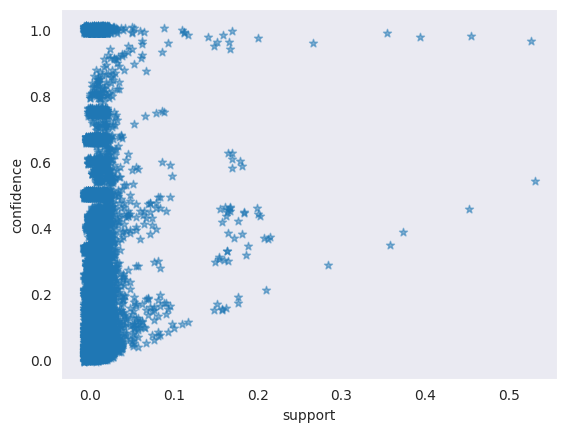

In [24]:
for i in range (len(support)):
    support[i] = support[i] + 0.0025 * (random.randint(1,10) - 5) 
    confidence[i] = confidence[i] + 0.0025 * (random.randint(1,10) - 5)

# Creating a scatter plot of support v confidence    
plt.scatter(support, confidence,   alpha=0.5, marker="*")
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()


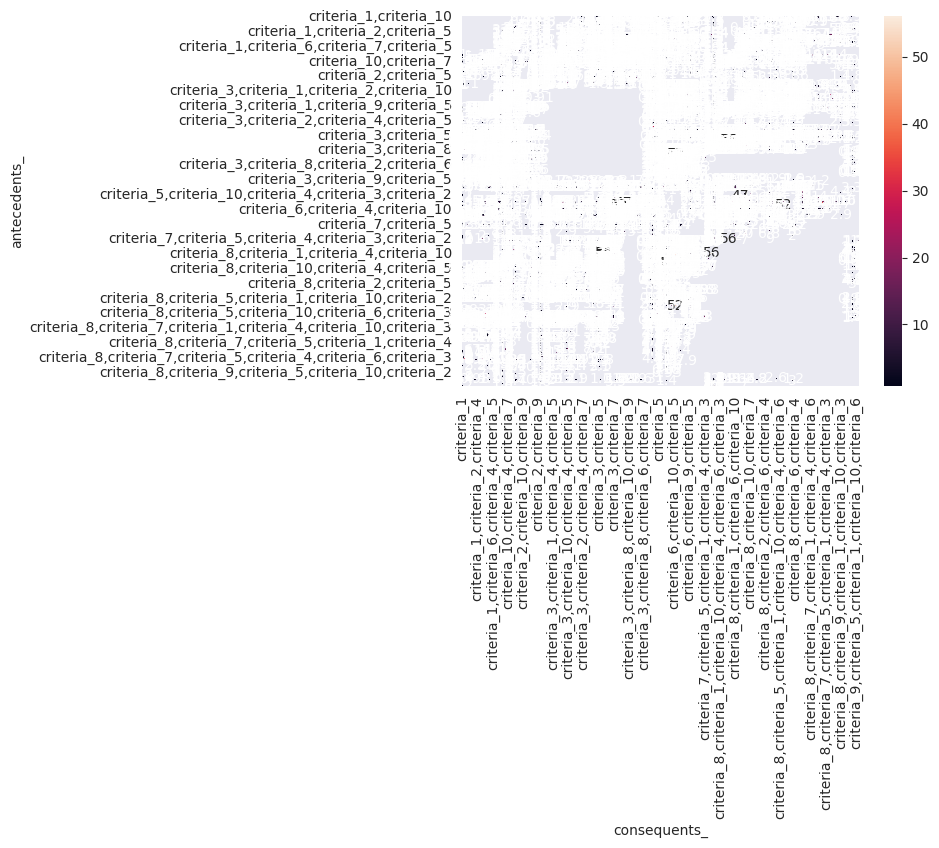

In [25]:
rules['lhs items'] = rules['antecedents'].apply(lambda x:len(x) )
rules[rules['lhs items']>1].sort_values('lift', ascending=False).head()

# Replace frozen sets with strings
rules['antecedents_'] = rules['antecedents'].apply(lambda a: ','.join(list(a)))
rules['consequents_'] = rules['consequents'].apply(lambda a: ','.join(list(a)))

# Transform the DataFrame of rules into a matrix using the lift metric
pivot = rules[rules['lhs items']>1].pivot(index = 'antecedents_', 
                    columns = 'consequents_', values= 'lift')

# Replace frozen sets with strings
rules['antecedents_'] = rules['antecedents'].apply(lambda a: ','.join(list(a)))
rules['consequents_'] = rules['consequents'].apply(lambda a: ','.join(list(a)))

# Transform the DataFrame of rules into a matrix using the lift metric
pivot = rules[rules['lhs items']>1].pivot(index = 'antecedents_', 
                    columns = 'consequents_', values= 'lift')

# Generate a heatmap with annotations on and the colorbar off
sns.heatmap(pivot, annot = True)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

In [26]:
freq_rules = apriori(df_final, min_support = 0.01, use_colnames = True)
freq_rules

,support,itemsets
0,0.454762,(criteria_1)
1,0.147619,(criteria_2)
2,0.542857,(criteria_3)
3,0.157143,(criteria_4)
4,0.983333,(criteria_5)
...,...,...
206,0.014286,"(criteria_7, criteria_5, criteria_10, criteria..."
207,0.011905,"(criteria_8, criteria_5, criteria_10, criteria..."
208,0.011905,"(criteria_8, criteria_5, criteria_10, criteria..."
209,0.016667,"(criteria_8, criteria_7, criteria_5, criteria_..."


In [27]:
freq_rules['length'] = freq_rules['itemsets'].apply(lambda x: len(x)) # adding 'length' column
freq_rules

,support,itemsets,length
0,0.454762,(criteria_1),1
1,0.147619,(criteria_2),1
2,0.542857,(criteria_3),1
3,0.157143,(criteria_4),1
4,0.983333,(criteria_5),1
...,...,...,...
206,0.014286,"(criteria_7, criteria_5, criteria_10, criteria...",5
207,0.011905,"(criteria_8, criteria_5, criteria_10, criteria...",5
208,0.011905,"(criteria_8, criteria_5, criteria_10, criteria...",5
209,0.016667,"(criteria_8, criteria_7, criteria_5, criteria_...",5


In [28]:
mask = freq_rules['length'] >= 2 # creating mask for filtering with certain condition
filtered_freq_rules = freq_rules.loc[mask] # applying mask
filtered_freq_rules # printing the filtering result

,support,itemsets,length
10,0.071429,"(criteria_1, criteria_2)",2
11,0.204762,"(criteria_3, criteria_1)",2
12,0.040476,"(criteria_1, criteria_4)",2
13,0.450000,"(criteria_1, criteria_5)",2
14,0.114286,"(criteria_1, criteria_6)",2
...,...,...,...
206,0.014286,"(criteria_7, criteria_5, criteria_10, criteria...",5
207,0.011905,"(criteria_8, criteria_5, criteria_10, criteria...",5
208,0.011905,"(criteria_8, criteria_5, criteria_10, criteria...",5
209,0.016667,"(criteria_8, criteria_7, criteria_5, criteria_...",5


Most frequently occuring criteria (3 or more) top 5

In [29]:
filtered_freq_rules.sort_values('support', ascending=False).head(10)

,support,itemsets,length
27,0.530952,"(criteria_3, criteria_5)",2
13,0.450000,"(criteria_1, criteria_5)",2
40,0.383333,"(criteria_8, criteria_5)",2
38,0.350000,"(criteria_6, criteria_5)",2
42,0.273810,"(criteria_10, criteria_5)",2
11,0.204762,"(criteria_3, criteria_1)",2
54,0.200000,"(criteria_3, criteria_1, criteria_5)",3
30,0.180952,"(criteria_3, criteria_8)",2
18,0.173810,"(criteria_1, criteria_10)",2
32,0.173810,"(criteria_3, criteria_10)",2


## Data Discovery

### Teams worked with families

In [30]:
df3.columns

Index(['FamilyID', 'IndividualID', 'Dataset', 'Dataset Detail', 'DOB', 'UPRN',
       'Post Code', 'WardCode', 'Ward Name', 'claim period', 'unique_id',
       '1.1', '1.2', '1.3', '1.4', '10.1', '10.2', '10.3', '2.1', '2.2', '2.3',
       '3.1', '3.2', '3.3', '4.1', '4.2', '5.1', '5.2', '5.3', '5.4', '6.1',
       '6.2', '6.3', '6.4', '6.5', '7.1', '7.2', '7.3', '8.1', '8.2', '8.3',
       '9.1', '9.2', '9.3', 'criteria_1', 'criteria_10', 'criteria_2',
       'criteria_3', 'criteria_4', 'criteria_5', 'criteria_6', 'criteria_7',
       'criteria_8', 'criteria_9'],
      dtype='object')

In [31]:
# Create unique ID based on FamilyID and Dataset and FamilyID and Dataset Detail
df3['fam_data'] = df3['FamilyID']+'-'+df3['Dataset']
df3['fam_detail'] = df3['FamilyID']+'-'+df3['Dataset Detail']

# Drop duplicate rows based on the 'ID' column, keeping the first occurrence
#df_unique = df3.drop_duplicates(subset='FamilyID', keep='first')

#df_unique.head()


Counts of interactions by team for each family:
Dataset
SocialCare          363
Schools             197
CC                  140
Add                  96
DWP                  92
MetPolice            43
NEET                 31
FACES                22
YOT                   8
MPS                   7
EarlyYears            5
Manual                4
Child at Address      4
HealthVisits          1
Name: count, dtype: int64

Team interaction counts:
Dataset
SocialCare          363
Schools             197
CC                  140
Add                  96
DWP                  92
MetPolice            43
NEET                 31
FACES                22
YOT                   8
MPS                   7
EarlyYears            5
Manual                4
Child at Address      4
HealthVisits          1
Name: count, dtype: int64


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'SocialCare'),
  Text(1, 0, 'Schools'),
  Text(2, 0, 'CC'),
  Text(3, 0, 'Add'),
  Text(4, 0, 'DWP'),
  Text(5, 0, 'MetPolice'),
  Text(6, 0, 'NEET'),
  Text(7, 0, 'FACES'),
  Text(8, 0, 'YOT'),
  Text(9, 0, 'MPS'),
  Text(10, 0, 'EarlyYears'),
  Text(11, 0, 'Manual'),
  Text(12, 0, 'Child at Address'),
  Text(13, 0, 'HealthVisits')])

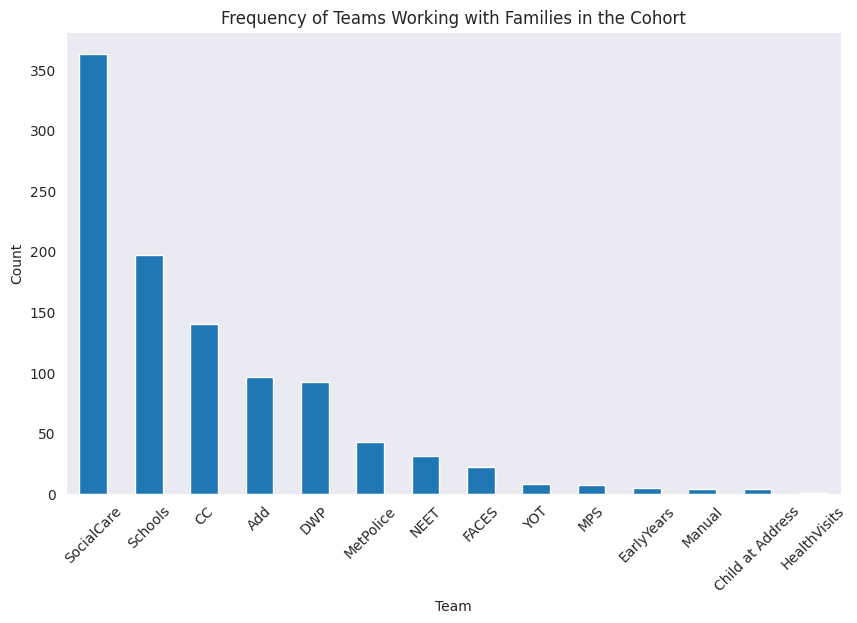

In [32]:
df5 = df3[['fam_data', 'Dataset']]
df5 = df5.drop_duplicates(subset='fam_data', keep='first')
# Set the first column ('ID') as the index
#df_unique.set_index('FamilyID', inplace=True)

# Count the number of times each team has worked with each family
team_counts = df5['Dataset'].value_counts()

# Display the counts
print("\nCounts of interactions by team for each family:")
print(team_counts)

# Display the counts
print("\nTeam interaction counts:")
print(team_counts)

# Create a bar chart
plt.figure(figsize=(10, 6))
team_counts.plot(kind='bar')

# Add title and labels
plt.title('Frequency of Teams Working with Families in the Cohort')
plt.xlabel('Team')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot


Counts of interactions by team for each family:
Dataset Detail
SocialCare          190
SEN                 190
CIN                 159
Events              115
DWP                  92
EarlyHelp            49
Attendance           38
Crime                34
NEET                 31
DomesticViolence     28
FACES                22
CC                   16
Exclusions           15
TwoYearOffer         13
MissingChildren      12
LAC                   9
YOT                   8
DV                    6
EarlyYears            5
Child at Address      4
CSE                   1
HealthVisits          1
Name: count, dtype: int64

Team interaction counts:
Dataset Detail
SocialCare          190
SEN                 190
CIN                 159
Events              115
DWP                  92
EarlyHelp            49
Attendance           38
Crime                34
NEET                 31
DomesticViolence     28
FACES                22
CC                   16
Exclusions           15
TwoYearOffer         13
Missi

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 [Text(0, 0, 'SocialCare'),
  Text(1, 0, 'SEN'),
  Text(2, 0, 'CIN'),
  Text(3, 0, 'Events'),
  Text(4, 0, 'DWP'),
  Text(5, 0, 'EarlyHelp'),
  Text(6, 0, 'Attendance'),
  Text(7, 0, 'Crime'),
  Text(8, 0, 'NEET'),
  Text(9, 0, 'DomesticViolence'),
  Text(10, 0, 'FACES'),
  Text(11, 0, 'CC'),
  Text(12, 0, 'Exclusions'),
  Text(13, 0, 'TwoYearOffer'),
  Text(14, 0, 'MissingChildren'),
  Text(15, 0, 'LAC'),
  Text(16, 0, 'YOT'),
  Text(17, 0, 'DV'),
  Text(18, 0, 'EarlyYears'),
  Text(19, 0, 'Child at Address'),
  Text(20, 0, 'CSE'),
  Text(21, 0, 'HealthVisits')])

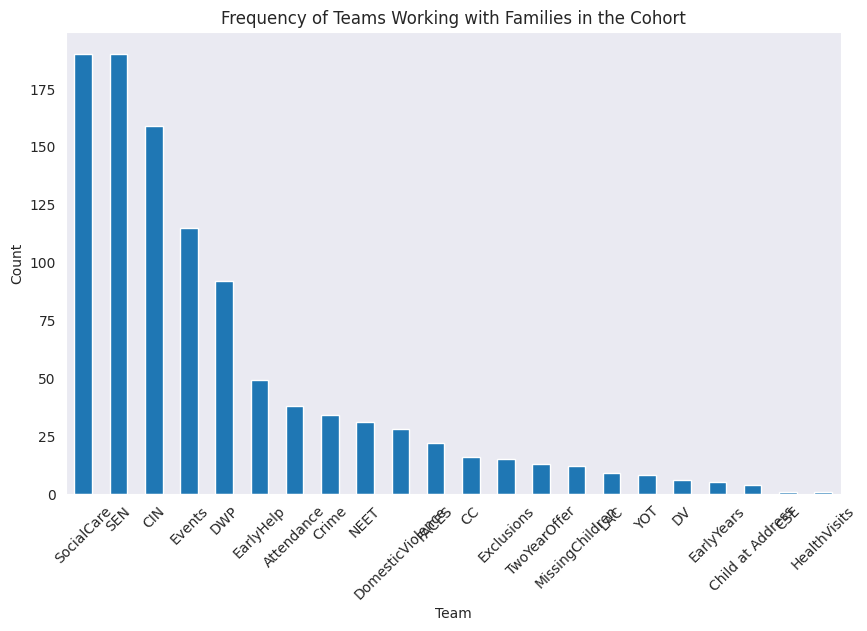

In [33]:
df6 = df3[['fam_detail', 'Dataset Detail']]
df6 = df6.drop_duplicates(subset='fam_detail', keep='first')
# Set the first column ('ID') as the index
#df_unique.set_index('FamilyID', inplace=True)

# Count the number of times each team has worked with each family
team_counts = df6['Dataset Detail'].value_counts()

# Display the counts
print("\nCounts of interactions by team for each family:")
print(team_counts)

# Display the counts
print("\nTeam interaction counts:")
print(team_counts)

# Create a bar chart
plt.figure(figsize=(10, 6))
team_counts.plot(kind='bar')

# Add title and labels
plt.title('Frequency of Teams Working with Families in the Cohort')
plt.xlabel('Team')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot

## AGE

In [34]:
# Create unique ID based on FamilyID and individualId
df3['pers_id'] = df3['FamilyID']+'-'+df3['IndividualID'].astype(str)

In [35]:
# Convert 'DOB' to datetime
df3['DOB'] = pd.to_datetime(df3['DOB'])

# Sort the DataFrame by 'DOB', with null values at the end
df3 = df3.sort_values(by='DOB', na_position='last')


In [36]:
# create new dataframe and remove duplicates
df7 = df3[['pers_id','DOB']]
df7 = df7.drop_duplicates(subset='pers_id', keep='first')


DataFrame with Age:
         pers_id        DOB   Age
1263    KC5291-3 1943-09-16  80.0
2243  RBKC0340-3 1944-02-20  80.0
1376    KC5780-7 1944-04-04  80.0
2394  RBKC1711-4 1944-05-30  80.0
2392  RBKC1711-2 1945-12-29  78.0
...          ...        ...   ...
2853   WCC4246-6        NaT   NaN
2893   WCC4141-1        NaT   NaN
2894   WCC4141-2        NaT   NaN
2999   WCC4117-1        NaT   NaN
3007   WCC4133-1        NaT   NaN

[1302 rows x 3 columns]

DataFrame with age buckets:
         pers_id        DOB   Age Age Bucket
1263    KC5291-3 1943-09-16  80.0        19+
2243  RBKC0340-3 1944-02-20  80.0        19+
1376    KC5780-7 1944-04-04  80.0        19+
2394  RBKC1711-4 1944-05-30  80.0        19+
2392  RBKC1711-2 1945-12-29  78.0        19+
...          ...        ...   ...        ...
2853   WCC4246-6        NaT   NaN      Nulls
2893   WCC4141-1        NaT   NaN      Nulls
2894   WCC4141-2        NaT   NaN      Nulls
2999   WCC4117-1        NaT   NaN      Nulls
3007   WCC4133-1      

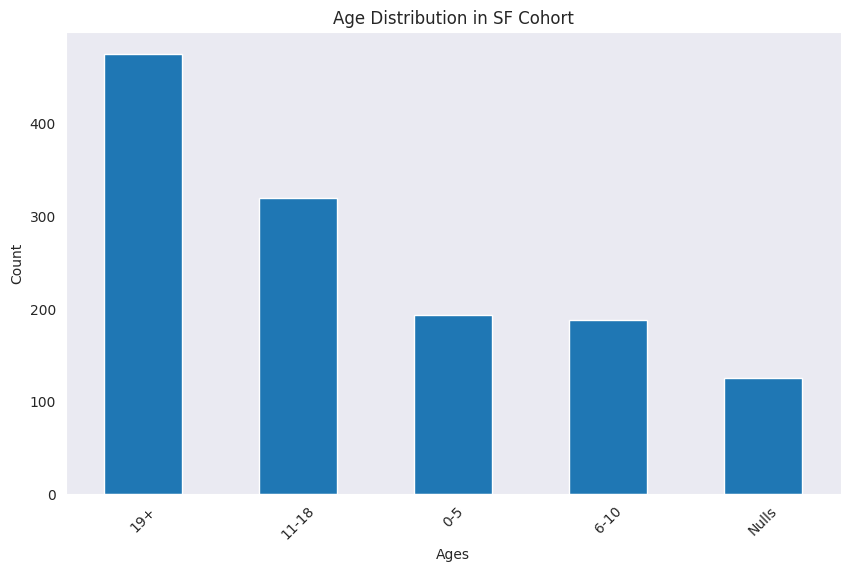

In [37]:
# Calculate the age based on the current date
current_date = datetime.now()
df7['Age'] = df7['DOB'].apply(lambda x: current_date.year - x.year - ((current_date.month, current_date.day) < (x.month, x.day)))

# Display the DataFrame with Age
print("\nDataFrame with Age:")
print(df7)

# Define age buckets
def age_bucket(age):
    if pd.isnull(age):
        return 'Nulls'
    elif age <= 5:
        return '0-5'
    elif age <= 10:
        return '6-10'
    elif age <= 18:
        return '11-18'
    else:
        return '19+'

# Apply the age bucket function
df7['Age Bucket'] = df7['Age'].apply(age_bucket)

# Display the DataFrame with age buckets
print("\nDataFrame with age buckets:")
print(df7)

# Count the occurrences of each age bucket
age_bucket_counts = df7['Age Bucket'].value_counts()

# Display the age bucket counts
print("\nCounts of each age bucket:")
print(age_bucket_counts)

# Create a bar chart
plt.figure(figsize=(10, 6))
age_bucket_counts.plot(kind='bar')

# Add title and labels
plt.title('Age Distribution in SF Cohort')
plt.xlabel('Ages')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.show()